# Assignment 3 : Deep Learning Model

## EDA

** Importing all the necessary libararies which will help us to build the model**

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
#Make plots bigger
plt.rcParams['figure.figsize'] = (16, 9)
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

C:\Users\cheta\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


** Load the data to the jupyter notebook using the pandas library and save that in data variable**

In [2]:
data = pd.read_csv("heart.csv") 

Check the data which we will be using in our assignment

In [3]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

** we check all the columns statistical attributes such as count, mean, standard deviation, etc.**

In [4]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
df=data.copy()

In [6]:
list(df.columns.values)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [7]:
df2= [col for col in data.columns if col in ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']]
out2=df[df2]
out2

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    1   1       130   266    0        1      171      0      0.6   
13    64    1   3       110   211    0        0      144      1      1.8   
14    58    0   3       150   283    1        0      162      0      1.0   
15    50    0   2       120   219    0        1      158      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
17    66    0   3       150   226    0        1      114      0      2.6   
18    43    1   0       150   247    0        1      171      0      1.5   
19    69    0   3       140   239    0        1      151      0      1.8   
20    59    1   0       135   234    0        1      161      0      0.5   
21    44    1   2       130   233    0        1      179      1      0.4   
22    42    1   0       140   226    0        1      178      0      0.0   
23    61    1   2       150   243    1        1      137      1      1.0   
24    40    1   3       140   199    0        1      178      1      1.4   
25    71    0   1       160   302    0        1      162      0      0.4   
26    59    1   2       150   212    1        1      157      0      1.6   
27    51    1   2       110   175    0        1      123      0      0.6   
28    65    0   2       140   417    1        0      157      0      0.8   
29    53    1   2       130   197    1        0      152      0      1.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
273   58    1   0       100   234    0        1      156      0      0.1   
274   47    1   0       110   275    0        0      118      1      1.0   
275   52    1   0       125   212    0        1      168      0      1.0   
276   58    1   0       146   218    0        1      105      0      2.0   
277   57    1   1       124   261    0        1      141      0      0.3   
278   58    0   1       136   319    1        0      152      0      0.0   
279   61    1   0       138   166    0        0      125      1      3.6   
280   42    1   0       136   315    0        1      125      1      1.8   
281   52    1   0       128   204    1        1      156      1      1.0   
282   59    1   2       126   218    1        1      134      0      2.2   
283   40    1   0       152   223    0        1      181      0      0.0   
284   61    1   0       140   207    0        0      138      1      1.9   
285   46    1   0       140   311    0        1      120      1      1.8   
286   59    1   3       134   204    0        1      162      0      0.8   
287   57    1   1       154   232    0        0      164      0      0.0   
288   57    1   0       110   335    0        1      143      1      3.0   
289   55    0   0       128   205    0        2      130      1      2.0   
290   61    1   0       148   203    0        1      161      0      0.0   
291   58    1   0       114   318    0        2      140      0      4.4   
292   58    0   0       170   225    1        0      146      1      2.8   
293   67    1   2       152   212    0        0      

** Split the data into X and Y where Y would be the column which we would be asking our designed model to predict**

In [8]:
X=out2[['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']]
y=out2[['target']]

In [9]:
from sklearn.cross_validation import train_test_split

C:\Users\cheta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


** using Sklearn's cross validation libary we will import the function train_test_split which will help us to split the data into training data and testing data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
X.shape

(303, 13)

# Part A Deep Learning model

** Create a class which we can pass various activation, loss, Optimizer and epochs functions to the model and also fit the model **

In [12]:
def Trained_model(activation='relu',loss='binary_crossentropy', optimizer='adam', epochs = 20):
    model=Sequential()
    
    #Layer 1
    model.add(tf.keras.layers.Dense(10, Activation(activation), input_shape=(X_train.shape[1],)))
    
    #Layer 2
    model.add(tf.keras.layers.Dense(64, Activation(activation)))
    
    #Layer 3
    model.add(tf.keras.layers.Dense(32, Activation(activation)))
    
    #Layer 4
    model.add(tf.keras.layers.Dense(16, Activation(activation)))

    
    # last layer has only two possible outcomes
    # either 0 or 1 indicating not diagnosed and diagnosed respectively
    model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))
    
    # get summary of the model
    model.summary()
    
    
    model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
    
    # model fitting, we train and test the data
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=256,validation_data=(X_test, y_test),verbose=1)
    cvscores = []
    scores = model.evaluate(X_test, y_test, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
    return model, history

**define a class "train_test_plot" which will give us the graphical representation of how the training accuracy holds up against the validation accuracy and also training loss with the validation loss**

In [13]:
def train_test_plot(history,epochs):
  plt.figure(0)
  plt.plot(history.history['acc'],'r')
  plt.plot(history.history['val_acc'],'g')
  plt.xticks(np.arange(0, epochs+1, 4.0))
  plt.rcParams['figure.figsize'] = (16, 9)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training Accuracy vs Validation Accuracy")
  plt.legend(['train','validation'])

  plt.figure(1)
  plt.plot(history.history['loss'],'r')
  plt.plot(history.history['val_loss'],'g')
  plt.xticks(np.arange(0, epochs+1, 2.0))
  plt.rcParams['figure.figsize'] = (16, 9)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss")
  plt.legend(['train','validation'])

** Checking the Deep Learning model we just built with the default parameters we passed when we built the class "Trained_Model"**

In [14]:
model0, history0 = Trained_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 3,469
Trainable params: 3,469
Non-trainable params: 0
_________________________________________________________________
Train on 212 samples, validate on 91 samples
Epoch 1/20
212/212 [==============================] - 5s 22ms/step - loss: 2.2477 - acc: 0.5566

** the above model with the default parameters which we passed in the class gave us the accuracy of the 62.64%**

below is the graphical representation of the same

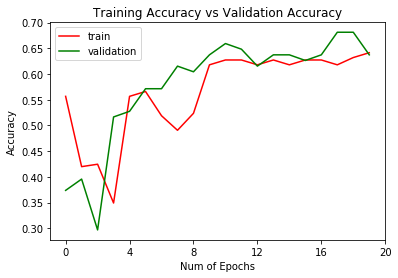

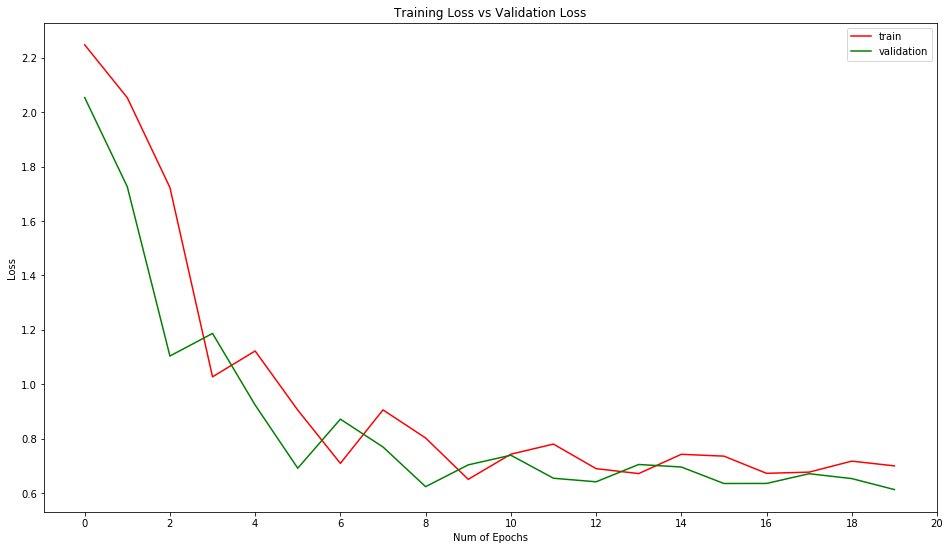

In [15]:
train_test_plot(history0,20)

# Part B - Activation function


**To see how the activation function affects the accuracy of the model we will pass our model with 5 different activation funtions. Viz,** 

**--> tanh**

**--> sigmoid**

**--> elu**

**--> relu**

**--> selu**

In [16]:
model1, history1 = Trained_model(activation='tanh')
model2, history2 = Trained_model(activation='sigmoid')
model3, history3 = Trained_model(activation='elu')
model4, history4 = Trained_model(activation='relu')
model5, history5 = Trained_model(activation='selu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 3,469
Trainable params: 3,469
Non-trainable params: 0
_________________________________________________________________
Train on 212 samples, validate on 91 samples
Epoch 1/20
212/212 [==============================] - 1s 4ms/step - loss: 0.6959 - acc: 0.4434 

212/212 [==============================] - 0s 68us/step - loss: 0.6864 - acc: 0.5566 - val_loss: 0.6960 - val_acc: 0.5165
Epoch 15/20
212/212 [==============================] - 0s 67us/step - loss: 0.6863 - acc: 0.5566 - val_loss: 0.6958 - val_acc: 0.5165
Epoch 16/20
212/212 [==============================] - 0s 72us/step - loss: 0.6863 - acc: 0.5566 - val_loss: 0.6956 - val_acc: 0.5165
Epoch 17/20
212/212 [==============================] - 0s 65us/step - loss: 0.6863 - acc: 0.5566 - val_loss: 0.6954 - val_acc: 0.5165
Epoch 18/20
212/212 [==============================] - 0s 67us/step - loss: 0.6863 - acc: 0.5566 - val_loss: 0.6952 - val_acc: 0.5165
Epoch 19/20
212/212 [==============================] - 0s 65us/step - loss: 0.6862 - acc: 0.5566 - val_loss: 0.6951 - val_acc: 0.5165
Epoch 20/20
91/91 [==============================] - 0s 120us/step
acc: 51.65%
51.65% (+/- 0.00%)
_________________________________________________________________
Layer (type)                 Output Shape   

Epoch 7/20
212/212 [==============================] - 0s 76us/step - loss: 0.8540 - acc: 0.4198 - val_loss: 0.8097 - val_acc: 0.4725
Epoch 8/20
212/212 [==============================] - 0s 63us/step - loss: 0.7532 - acc: 0.4906 - val_loss: 0.8874 - val_acc: 0.5055
Epoch 9/20
212/212 [==============================] - 0s 79us/step - loss: 0.8256 - acc: 0.5566 - val_loss: 0.9196 - val_acc: 0.5055
Epoch 10/20
212/212 [==============================] - 0s 75us/step - loss: 0.8590 - acc: 0.5566 - val_loss: 0.8372 - val_acc: 0.5055
Epoch 11/20
212/212 [==============================] - 0s 64us/step - loss: 0.7847 - acc: 0.5566 - val_loss: 0.7572 - val_acc: 0.4945
Epoch 12/20
212/212 [==============================] - 0s 63us/step - loss: 0.7166 - acc: 0.5283 - val_loss: 0.7800 - val_acc: 0.4396
Epoch 13/20
212/212 [==============================] - 0s 62us/step - loss: 0.7531 - acc: 0.4198 - val_loss: 0.8031 - val_acc: 0.4725
Epoch 14/20
212/212 [==============================] - 0s 50us/st

| Activation | Loss | Optimizer | epochs | Accuracy |
| --- | --- | --- | --- | --- |
| tanh | binary_Crossentropy | adam | 20 | 51.65% |
| sigmoid | binary_Crossentropy | adam | 20 | 51.65% |
| elu | binary_Crossentropy | adam | 20 | 68.13% |
| relu | binary_Crossentropy | adam | 20 | 60.44% |
| selu | binary_Crossentropy | adam | 20 | 48.35% |

the model works well with the "elu" activation function compaared to all other activation functions

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Activation Funtion "TANH"**

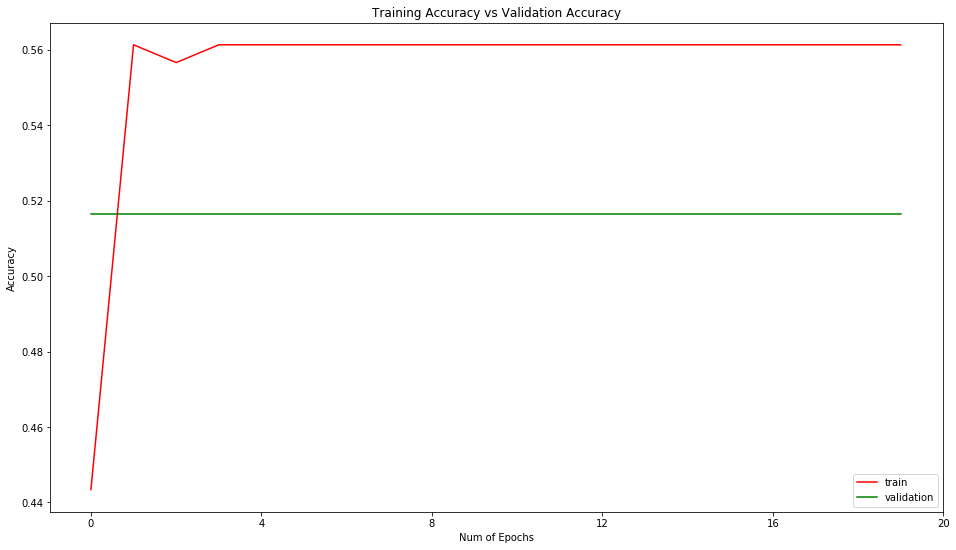

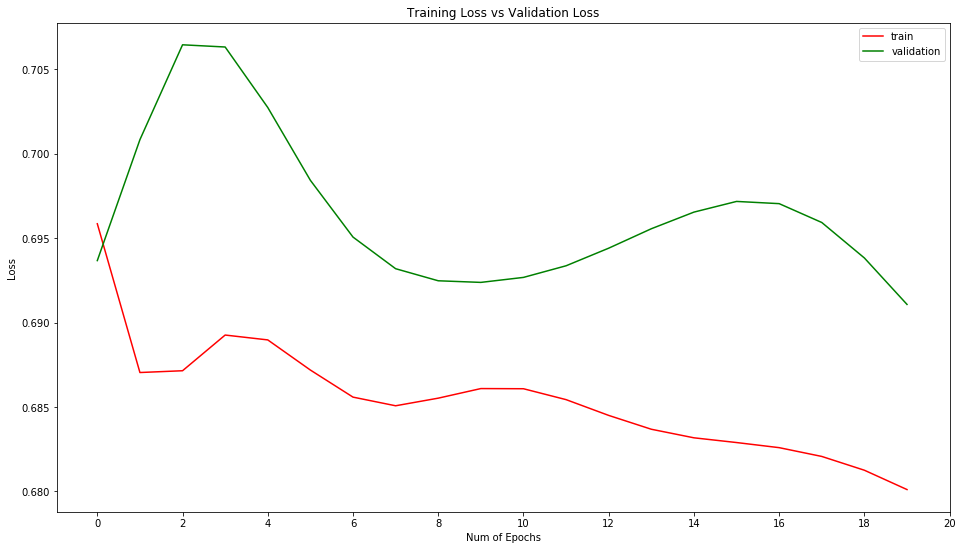

In [17]:
train_test_plot(history1,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Activation Funtion "SIGMOID"**

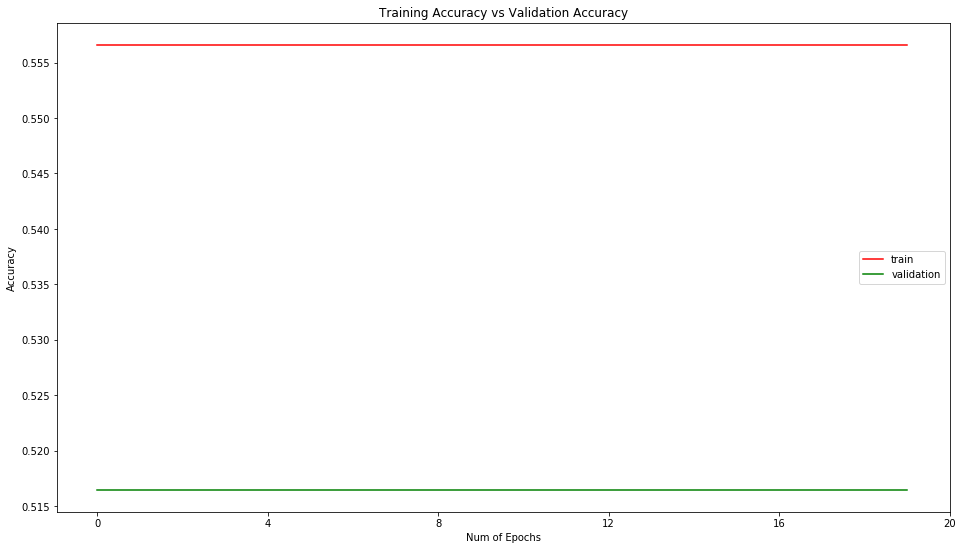

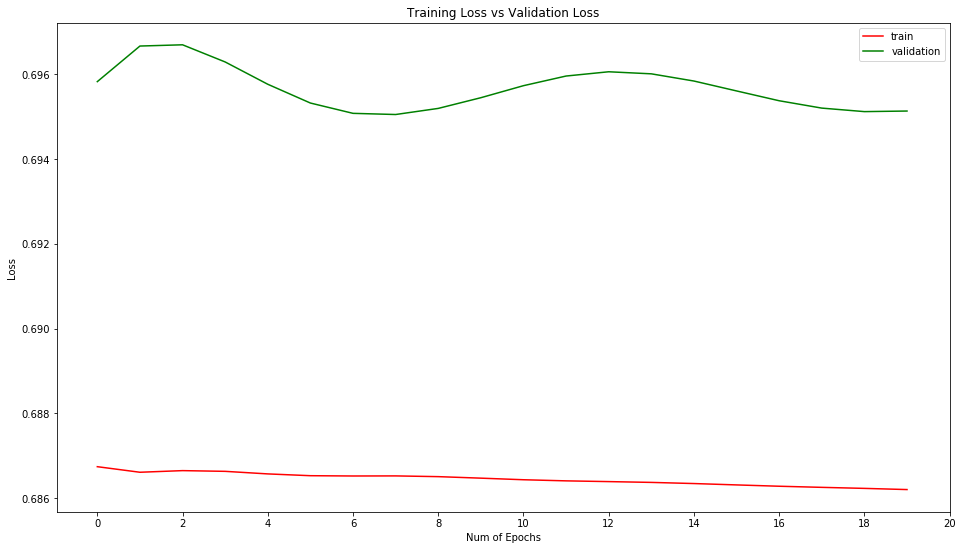

In [18]:
train_test_plot(history2,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Activation Funtion "ELU"**

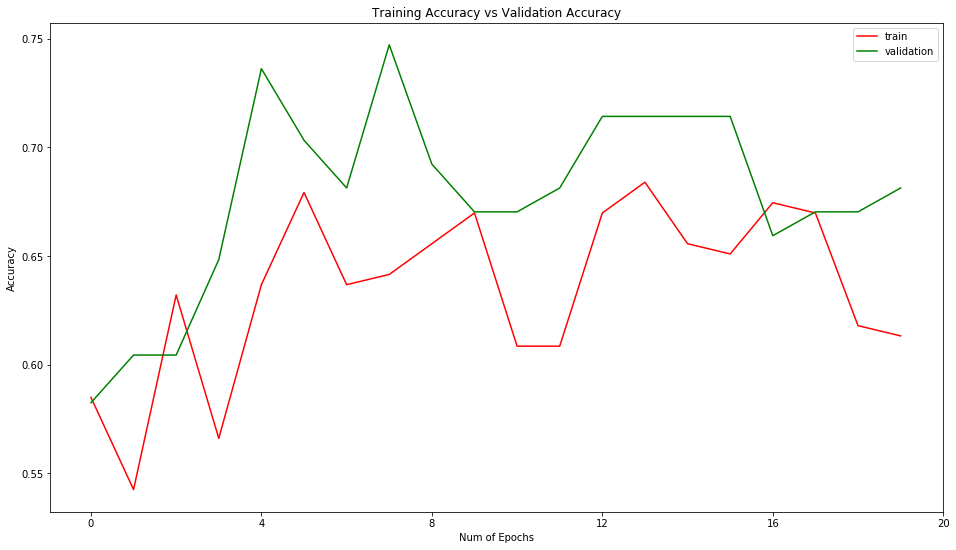

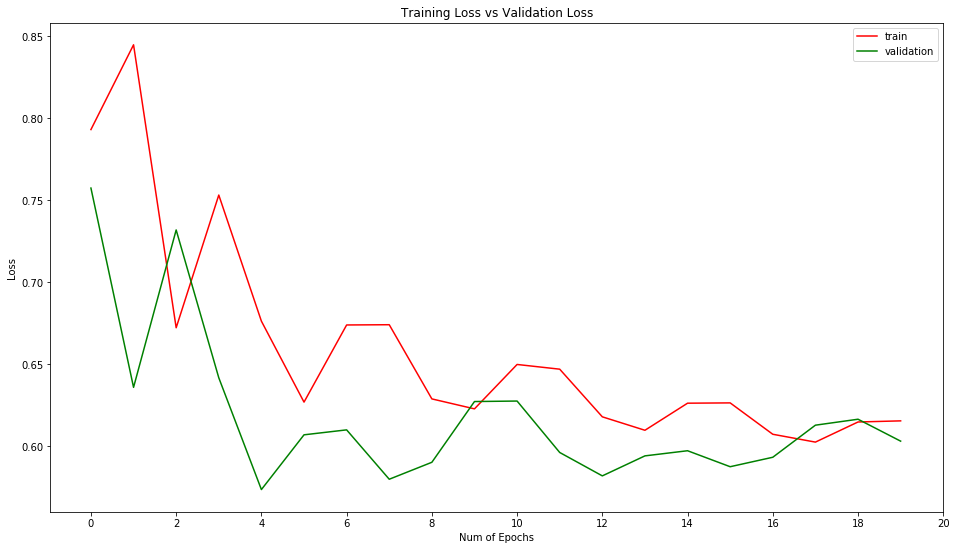

In [19]:
train_test_plot(history3,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Activation Funtion "RELU"**

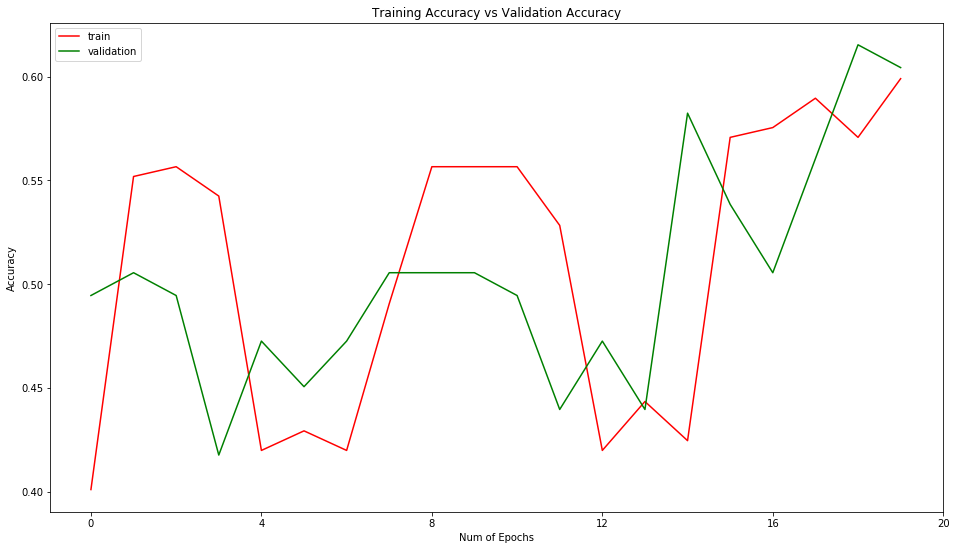

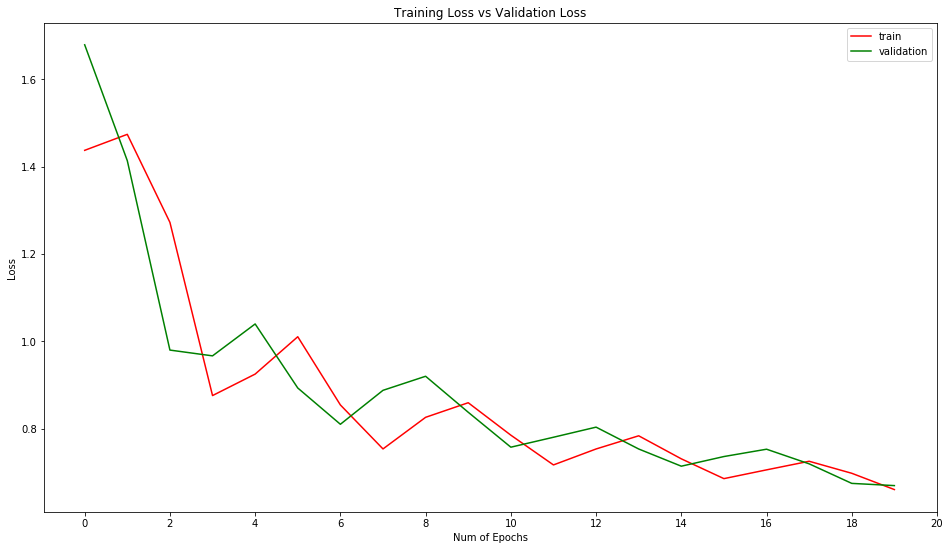

In [20]:
train_test_plot(history4,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Activation Funtion "SELU"**

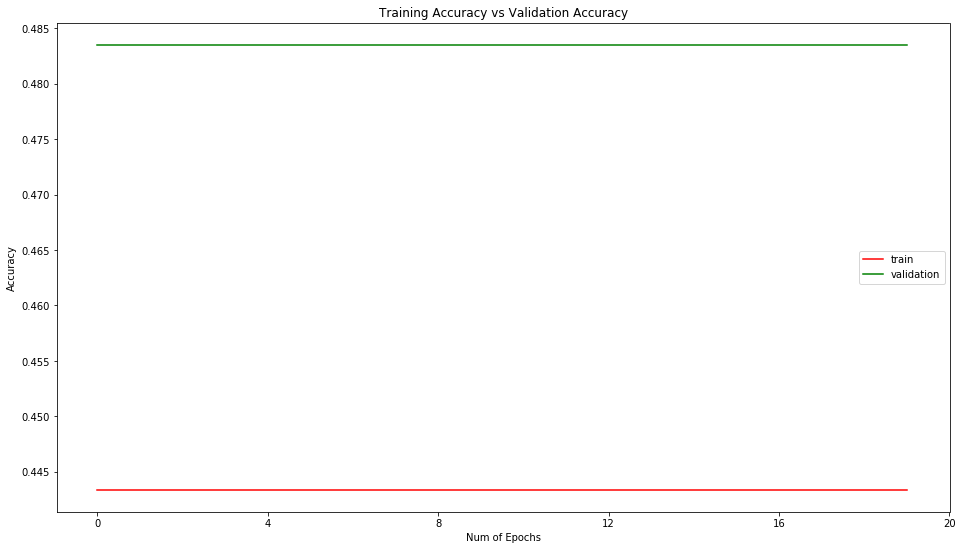

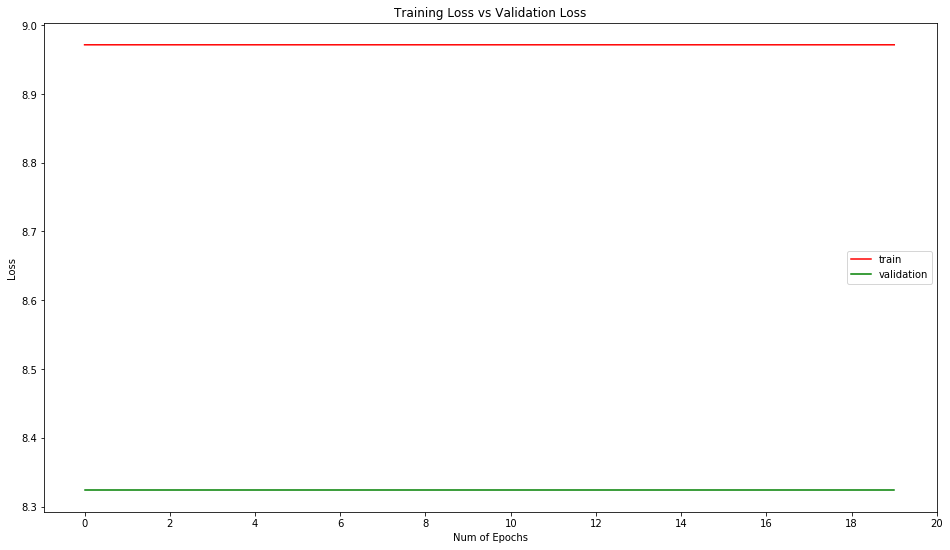

In [21]:
train_test_plot(history5,20)

# Part C - Cost function

**To see how the loss function affects the accuracy of the model we will pass our model with 5 different loss funtions. Viz,** 

**--> mean_squared_error**

**--> binary_crossentropy**

**--> cosine_proximity**

**--> kullback_leibler_divergence**


In [22]:
model6, history6 = Trained_model(loss='mean_squared_error')
model7, history7 = Trained_model(loss='binary_crossentropy')
model8, history8 = Trained_model(loss='cosine_proximity')
model9, history9 = Trained_model(loss='kullback_leibler_divergence')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 3,469
Trainable params: 3,469
Non-trainable params: 0
_________________________________________________________________
Train on 212 samples, validate on 91 samples
Epoch 1/20
212/212 [==============================] - 1s 6ms/step - loss: 0.4434 - acc: 0.5566 

Epoch 15/20
212/212 [==============================] - 0s 45us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 16/20
212/212 [==============================] - 0s 44us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 17/20
212/212 [==============================] - 0s 44us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 18/20
212/212 [==============================] - 0s 48us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 19/20
212/212 [==============================] - 0s 44us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 20/20
91/91 [==============================] - 0s 82us/step
acc: 51.65%
51.65% (+/- 0.00%)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                140       
___________________________________

Epoch 7/20
212/212 [==============================] - 0s 72us/step - loss: -7.1298e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.5165
Epoch 8/20
212/212 [==============================] - 0s 60us/step - loss: -7.1298e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.5165
Epoch 9/20
212/212 [==============================] - 0s 69us/step - loss: -7.1355e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.5165
Epoch 10/20
212/212 [==============================] - 0s 65us/step - loss: -7.1411e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.5165
Epoch 11/20
212/212 [==============================] - 0s 62us/step - loss: -7.1411e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.5165
Epoch 12/20
212/212 [==============================] - 0s 60us/step - loss: -7.1411e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.5165
Epoch 13/20
212/212 [==============================] - 0s 62us/step - loss: -7.1411e-07 - acc: 0.5566 - val_loss: -7.7934e-07 - val_acc: 0.

| Activation | Loss | Optimizer | epochs | Accuracy |
| --- | --- | --- | --- | --- |
| relu | mean_squared_error | adam | 20 | 69.23% |
| relu | binary_crossentropy | adam | 20 | 51.65% |
| relu | cosine_proximity | adam | 20 | 48.35% |
| relu | kullback_leibler_divergence | adam | 20 | 51.65% |

the model works well with the "mean_squared_error" loss function compaared to all other loss functions

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Loss Funtion "mean_squared_error"**

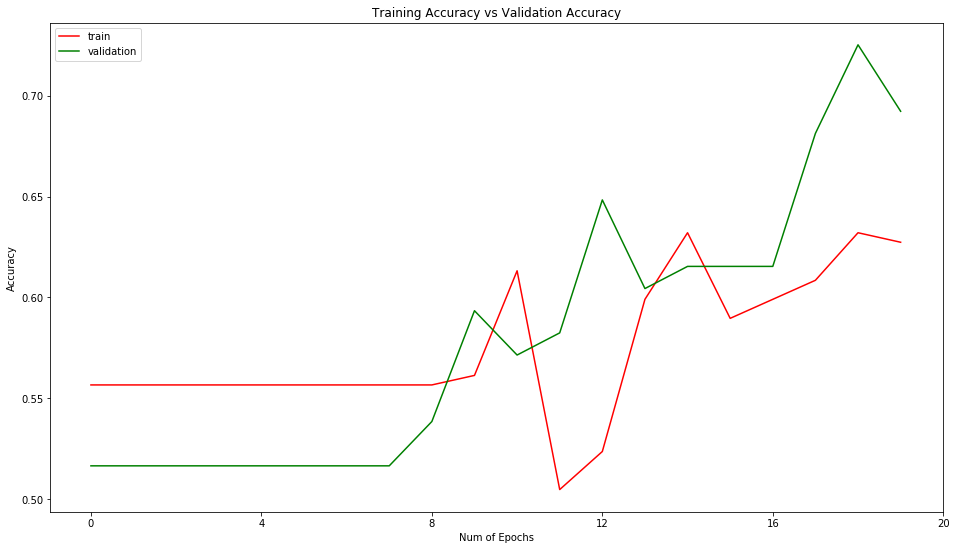

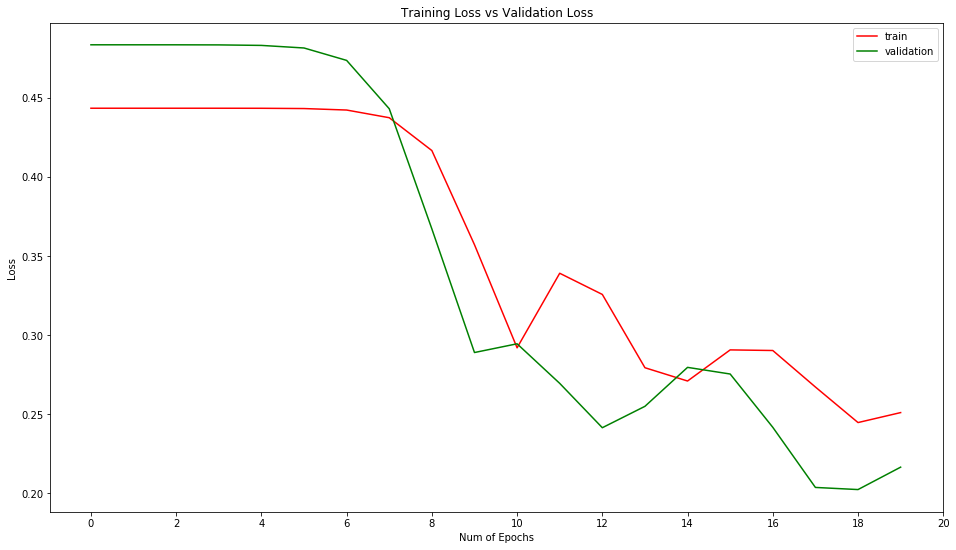

In [23]:
train_test_plot(history6,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Loss Funtion "binary_crossentropy"**

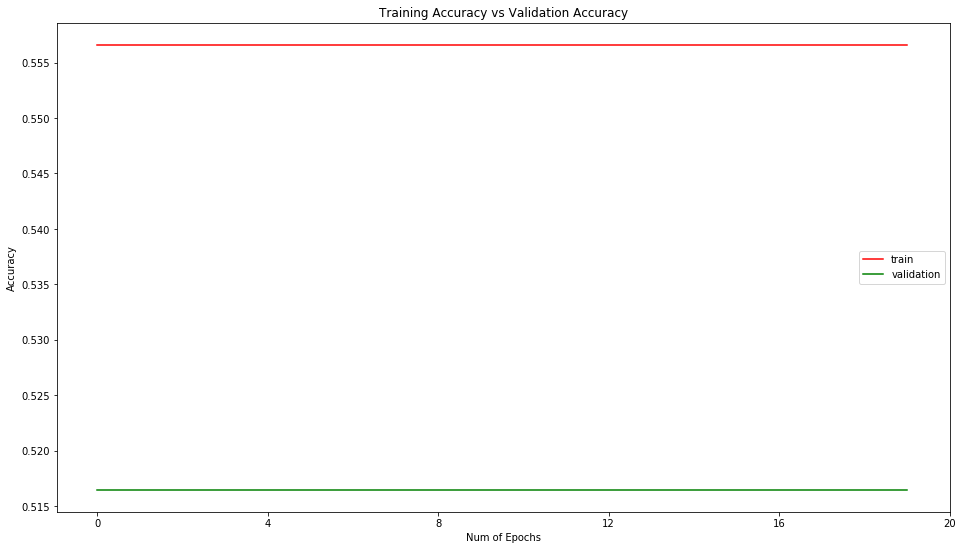

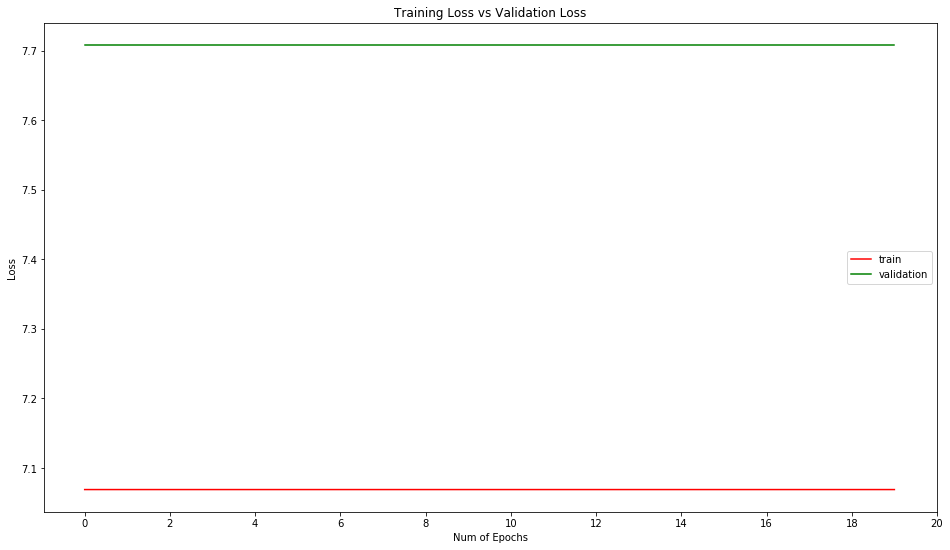

In [24]:
train_test_plot(history7,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Loss Funtion "cosine_proximity"**

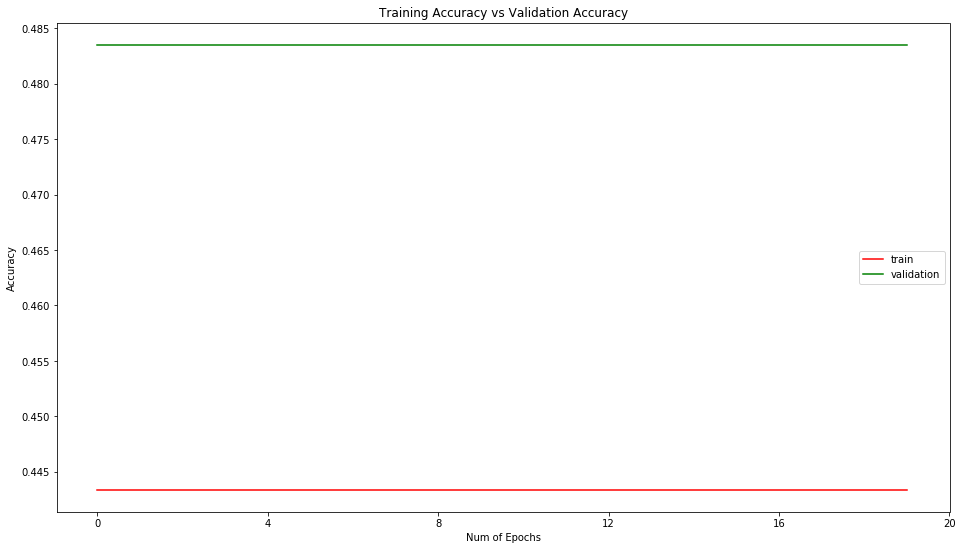

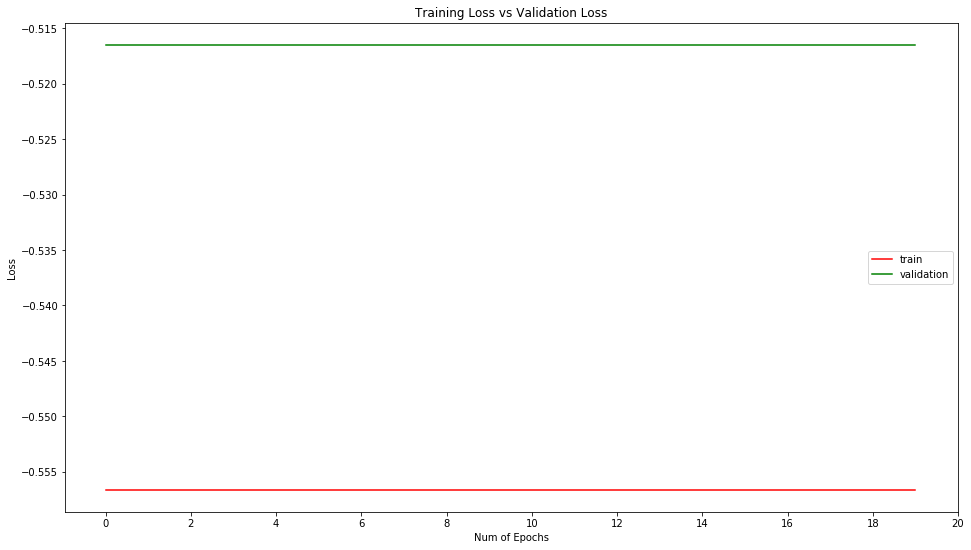

In [25]:
train_test_plot(history8,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Loss Funtion "kullback_leibler_divergence"**

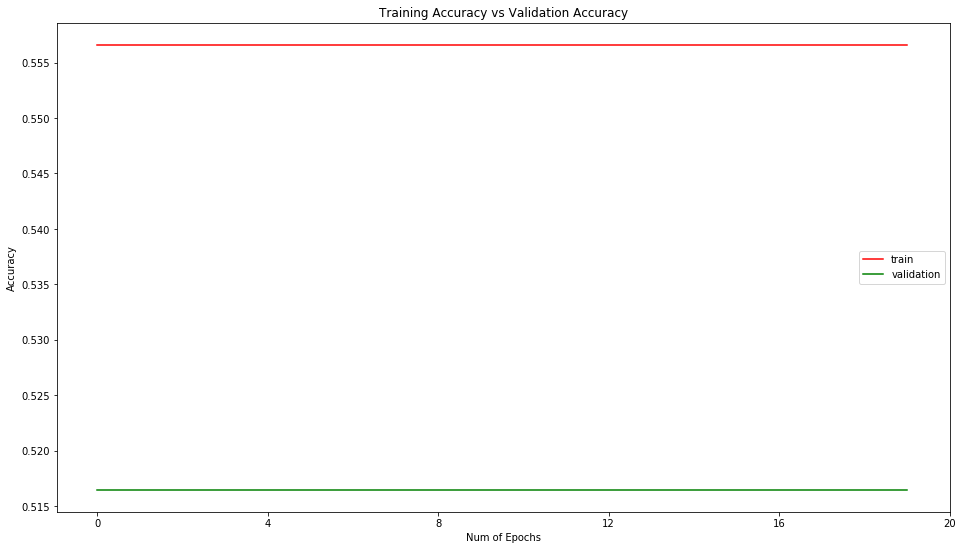

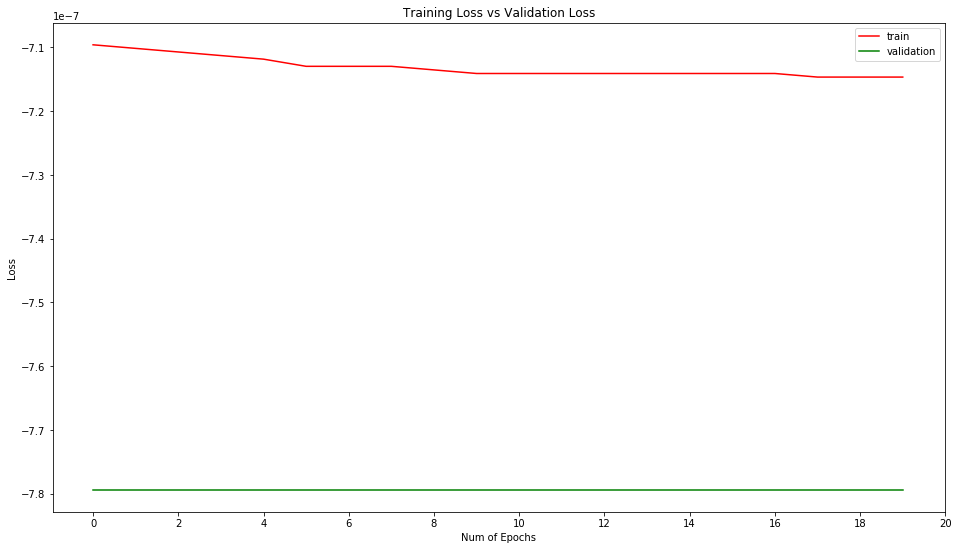

In [26]:
train_test_plot(history9,20)

# Part D - Epochs

**To see how the epochs affects the accuracy of the model we will pass our model with 5 different epochs. Viz,** 

**--> 20**

**--> 40**

**--> 60**

**--> 80**

**--> 100**

In [27]:
model10,history10 = Trained_model(epochs=20)
model11,history11 = Trained_model(epochs=40)
model12,history12 = Trained_model(epochs=60)
model13,history13 = Trained_model(epochs=80)
model14,history14 = Trained_model(epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_52 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 3,469
Trainable params: 3,469
Non-trainable params: 0
_________________________________________________________________
Train on 212 samples, validate on 91 samples
Epoch 1/20
212/212 [==============================] - 2s 9ms/step - loss: 0.9531 - acc: 0.5849 

212/212 [==============================] - 0s 67us/step - loss: 1.2609 - acc: 0.5566 - val_loss: 1.0252 - val_acc: 0.5385
Epoch 15/40
212/212 [==============================] - 0s 65us/step - loss: 0.9656 - acc: 0.5755 - val_loss: 0.7356 - val_acc: 0.6923
Epoch 16/40
212/212 [==============================] - 0s 68us/step - loss: 0.6738 - acc: 0.6462 - val_loss: 0.8297 - val_acc: 0.5275
Epoch 17/40
212/212 [==============================] - 0s 76us/step - loss: 0.7737 - acc: 0.4670 - val_loss: 1.0398 - val_acc: 0.5055
Epoch 18/40
212/212 [==============================] - 0s 61us/step - loss: 1.0005 - acc: 0.4670 - val_loss: 1.0088 - val_acc: 0.5275
Epoch 19/40
212/212 [==============================] - 0s 76us/step - loss: 0.9683 - acc: 0.4717 - val_loss: 0.8020 - val_acc: 0.5824
Epoch 20/40
212/212 [==============================] - 0s 85us/step - loss: 0.7471 - acc: 0.5425 - val_loss: 0.7095 - val_acc: 0.6264
Epoch 21/40
212/212 [==============================] - 0s 80us/step - loss

Epoch 21/60
212/212 [==============================] - 0s 66us/step - loss: 0.7157 - acc: 0.5991 - val_loss: 0.7584 - val_acc: 0.5495
Epoch 22/60
212/212 [==============================] - 0s 67us/step - loss: 0.7277 - acc: 0.6132 - val_loss: 0.7743 - val_acc: 0.5604
Epoch 23/60
212/212 [==============================] - 0s 62us/step - loss: 0.7389 - acc: 0.6085 - val_loss: 0.7857 - val_acc: 0.5824
Epoch 24/60
212/212 [==============================] - 0s 77us/step - loss: 0.7463 - acc: 0.6132 - val_loss: 0.7883 - val_acc: 0.5824
Epoch 25/60
212/212 [==============================] - 0s 67us/step - loss: 0.7491 - acc: 0.6132 - val_loss: 0.7852 - val_acc: 0.5824
Epoch 26/60
212/212 [==============================] - 0s 70us/step - loss: 0.7473 - acc: 0.6085 - val_loss: 0.7771 - val_acc: 0.5824
Epoch 27/60
212/212 [==============================] - 0s 86us/step - loss: 0.7394 - acc: 0.6226 - val_loss: 0.7658 - val_acc: 0.5714
Epoch 28/60
212/212 [==============================] - 0s 78us

Epoch 8/80
212/212 [==============================] - 0s 80us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 9/80
212/212 [==============================] - 0s 60us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 10/80
212/212 [==============================] - 0s 68us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 11/80
212/212 [==============================] - 0s 67us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 12/80
212/212 [==============================] - 0s 69us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 13/80
212/212 [==============================] - 0s 78us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 14/80
212/212 [==============================] - 0s 59us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 15/80
212/212 [==============================] - 0s 78us/s

Epoch 70/80
212/212 [==============================] - 0s 74us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 71/80
212/212 [==============================] - 0s 68us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 72/80
212/212 [==============================] - 0s 71us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 73/80
212/212 [==============================] - 0s 72us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 74/80
212/212 [==============================] - 0s 76us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 75/80
212/212 [==============================] - 0s 77us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 76/80
212/212 [==============================] - 0s 78us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 77/80
212/212 [==============================] - 0s 74us

Epoch 37/100
212/212 [==============================] - 0s 73us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 38/100
212/212 [==============================] - 0s 65us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 39/100
212/212 [==============================] - 0s 77us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 40/100
212/212 [==============================] - 0s 69us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 41/100
212/212 [==============================] - 0s 85us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 42/100
212/212 [==============================] - 0s 74us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 43/100
212/212 [==============================] - 0s 66us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 44/100
212/212 [==============================] -

Epoch 98/100
212/212 [==============================] - 0s 65us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 99/100
212/212 [==============================] - 0s 78us/step - loss: 7.0688 - acc: 0.5566 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 100/100
91/91 [==============================] - 0s 141us/step
acc: 51.65%
51.65% (+/- 0.00%)


| Activation | Loss | Optimizer | epochs | Accuracy |
| --- | --- | --- | --- | --- |
| relu | binary_crossentropy | adam | 20 | 67.03% |
| relu | binary_crossentropy | adam | 40 | 68.13% |
| relu | binary_crossentropy | adam | 60 | 68.13% |
| relu | binary_crossentropy | adam | 80 | 51.65% |
| relu | binary_crossentropy | adam | 100 | 51.65% |

the model works well with the "60" epochs  to all others

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Epoch = "20"**

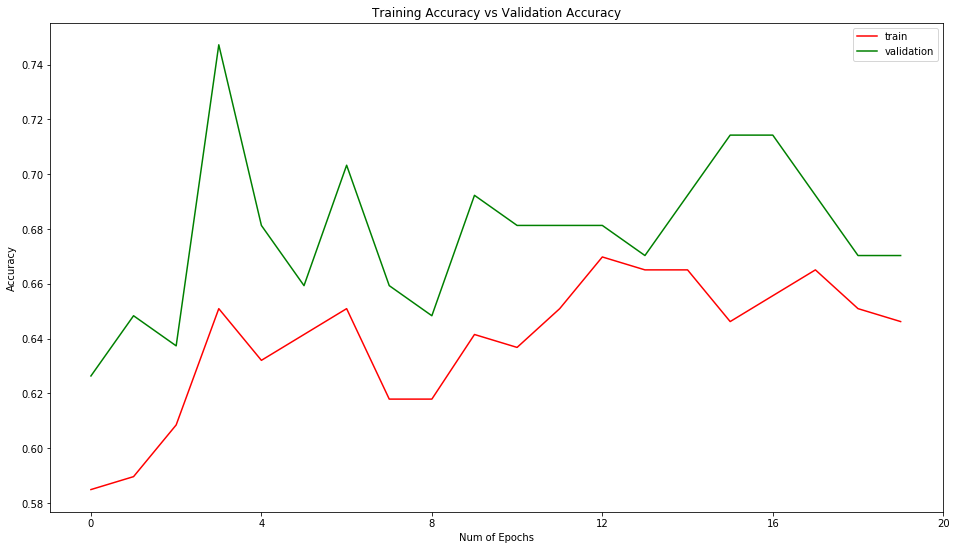

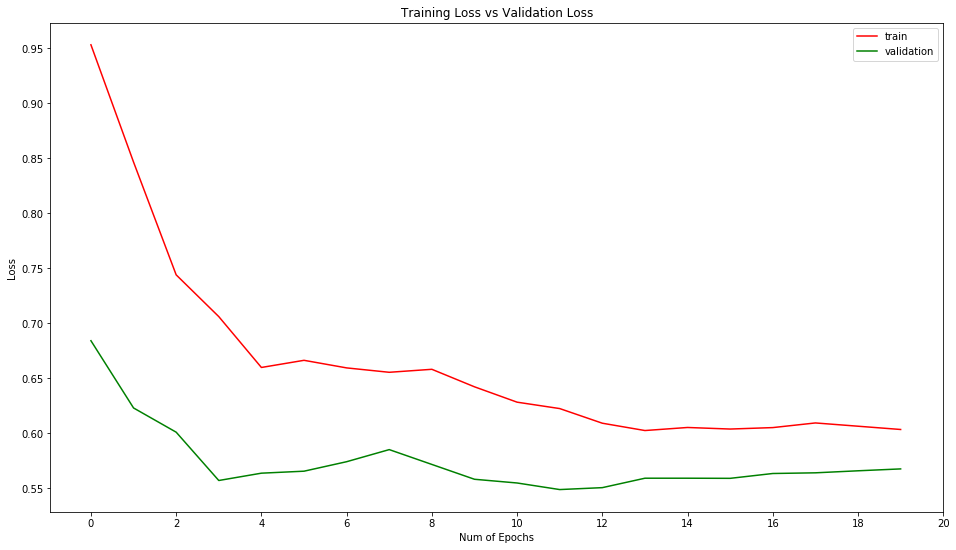

In [28]:
train_test_plot(history10,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Epoch = "40"**

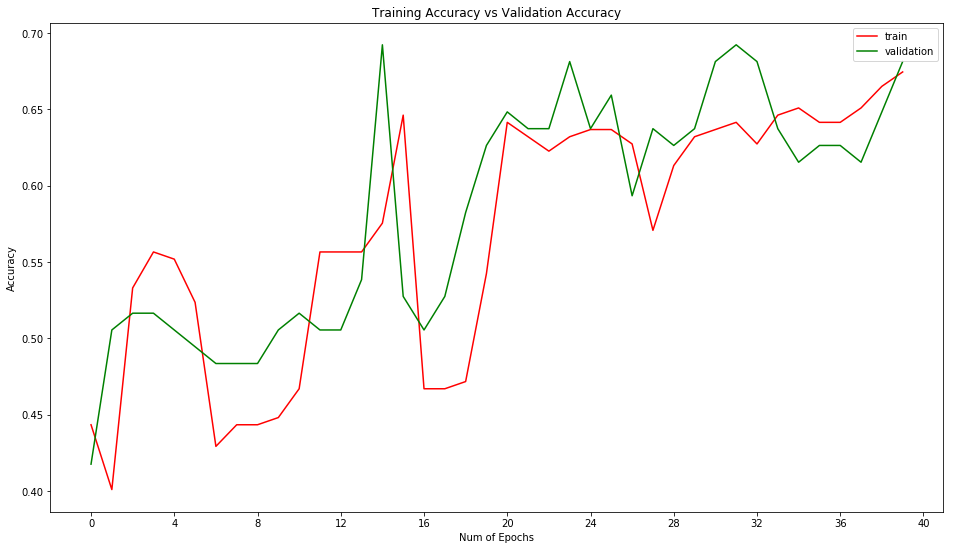

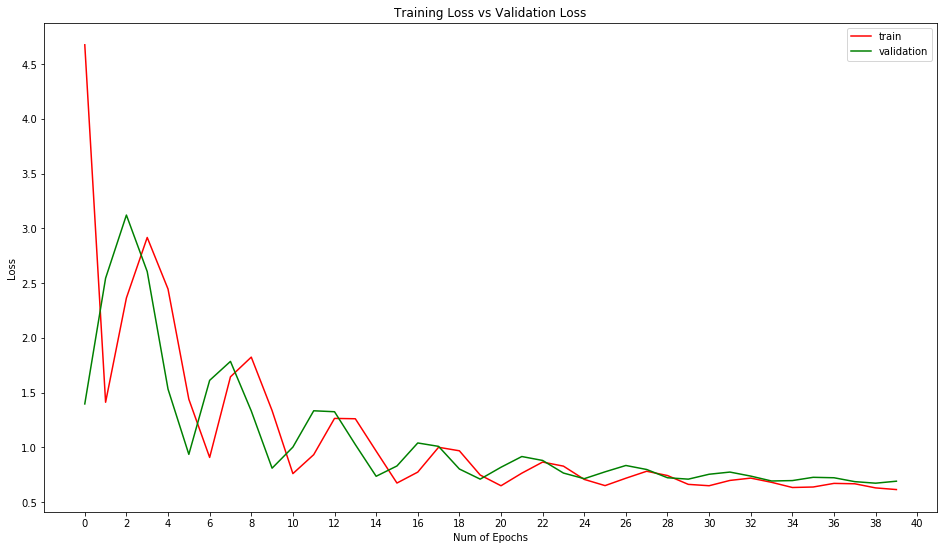

In [29]:
train_test_plot(history11,40)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Epoch = "60"**

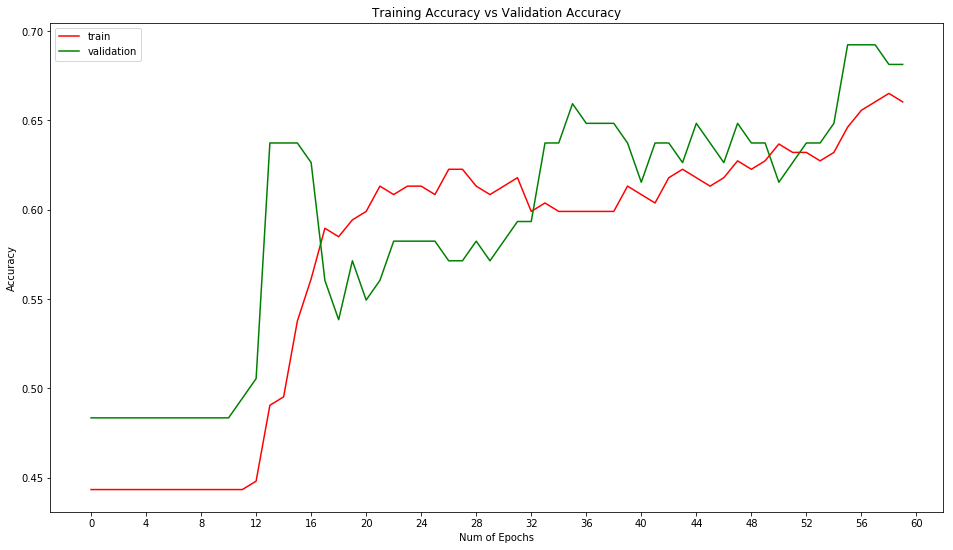

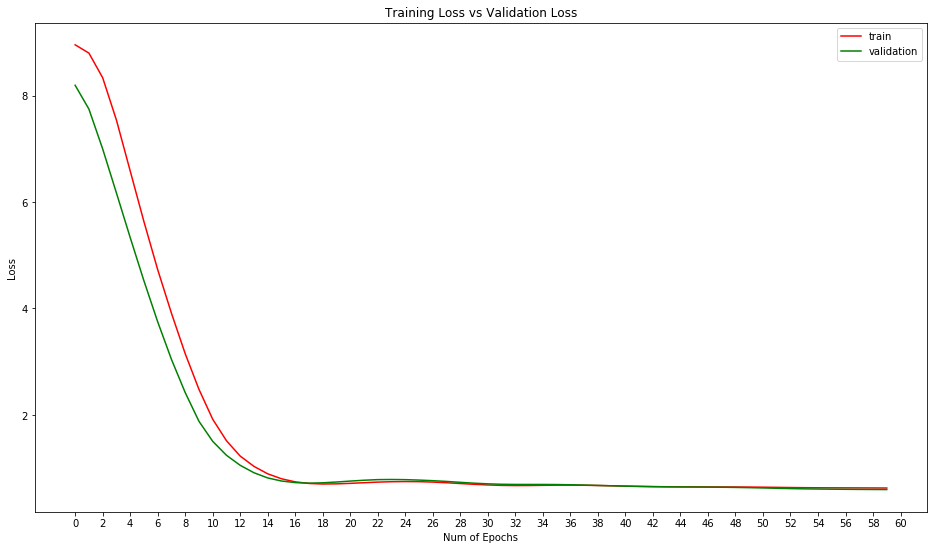

In [30]:
train_test_plot(history12,60)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Epoch = "80"**

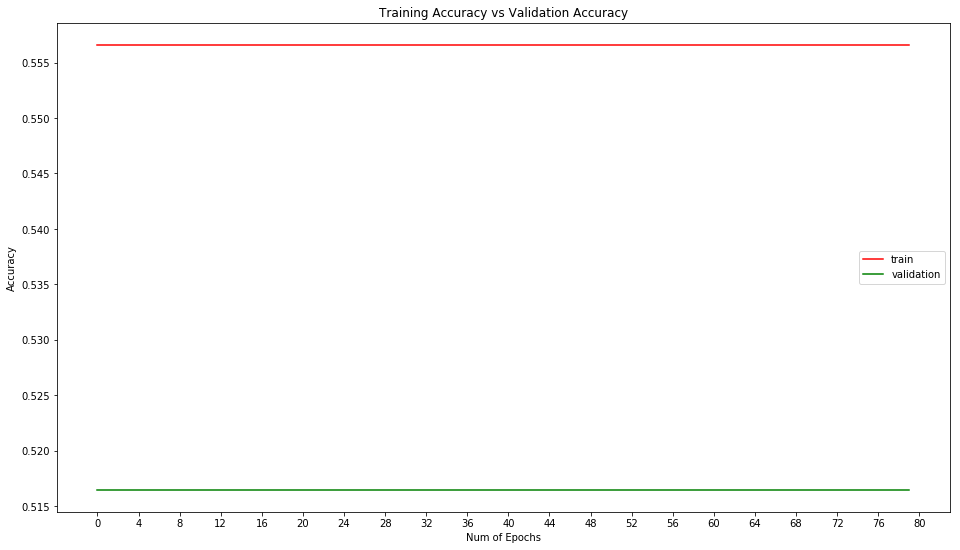

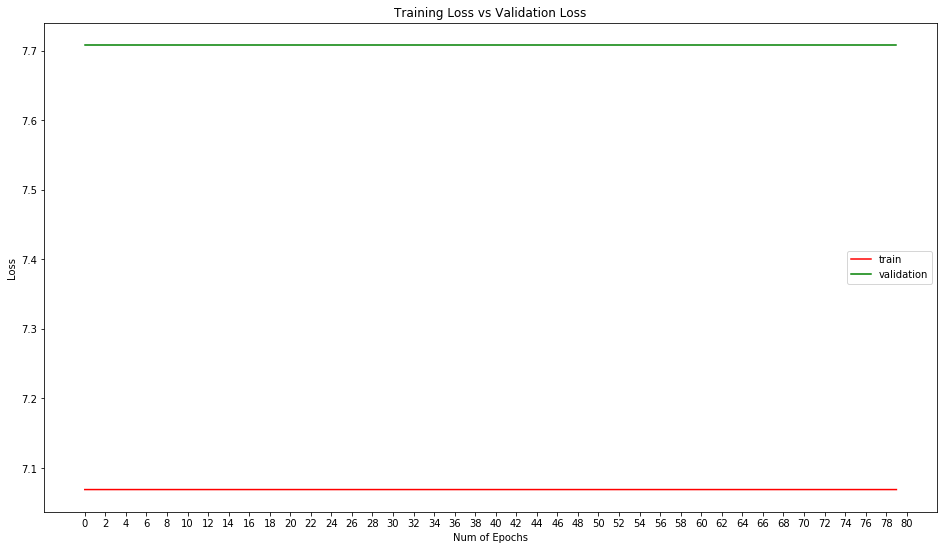

In [31]:
train_test_plot(history13,80)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Epoch = "100"**

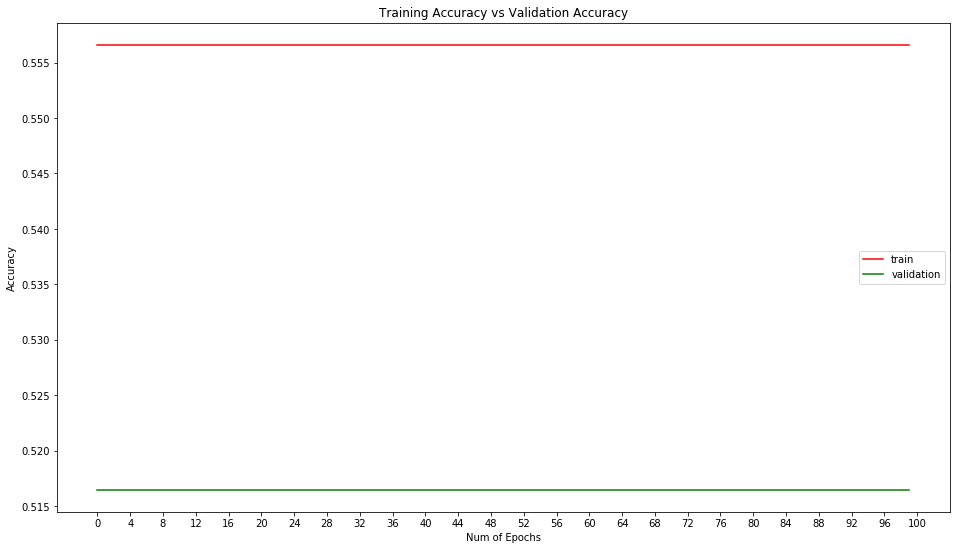

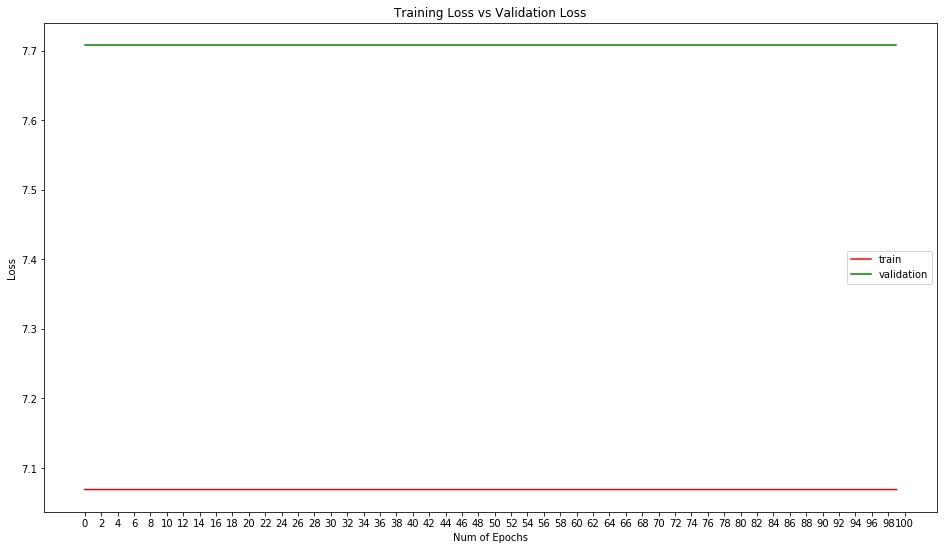

In [32]:
train_test_plot(history14,100)

# Part E - Gradient estimation


**To see how the Gradient Estimation function affects the accuracy of the model we will pass our model with 5 different Gradient Estimation funtions. Viz,** 

**--> adam**

**--> adagard**

**--> RMSProp**

**--> Adadelta**


In [33]:
model15,history15 = Trained_model(optimizer='adam')
model16,history16 = Trained_model(optimizer='Adagrad')
model17,history17 = Trained_model(optimizer='RMSProp')
model18,history18 = Trained_model(optimizer='Adadelta')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_77 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_79 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 17        
Total params: 3,469
Trainable params: 3,469
Non-trainable params: 0
_________________________________________________________________
Train on 212 samples, validate on 91 samples
Epoch 1/20
212/212 [==============================] - 2s 12ms/step - loss: 7.2983 - acc: 0.4434

Epoch 15/20
212/212 [==============================] - 0s 38us/step - loss: 8.9714 - acc: 0.4434 - val_loss: 8.3247 - val_acc: 0.4835
Epoch 16/20
212/212 [==============================] - 0s 39us/step - loss: 8.9714 - acc: 0.4434 - val_loss: 8.3247 - val_acc: 0.4835
Epoch 17/20
212/212 [==============================] - 0s 48us/step - loss: 8.9714 - acc: 0.4434 - val_loss: 8.3247 - val_acc: 0.4835
Epoch 18/20
212/212 [==============================] - 0s 44us/step - loss: 8.9714 - acc: 0.4434 - val_loss: 8.3247 - val_acc: 0.4835
Epoch 19/20
212/212 [==============================] - 0s 32us/step - loss: 8.9714 - acc: 0.4434 - val_loss: 8.3247 - val_acc: 0.4835
Epoch 20/20
91/91 [==============================] - 0s 90us/step
acc: 48.35%
48.35% (+/- 0.00%)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 10)                140       
___________________________________

Epoch 8/20
212/212 [==============================] - 0s 46us/step - loss: 1.7061 - acc: 0.5708 - val_loss: 1.5441 - val_acc: 0.4835
Epoch 9/20
212/212 [==============================] - 0s 50us/step - loss: 1.5023 - acc: 0.4623 - val_loss: 1.8399 - val_acc: 0.5165
Epoch 10/20
212/212 [==============================] - 0s 53us/step - loss: 1.6762 - acc: 0.5660 - val_loss: 1.4337 - val_acc: 0.4725
Epoch 11/20
212/212 [==============================] - 0s 54us/step - loss: 1.4027 - acc: 0.4670 - val_loss: 1.7696 - val_acc: 0.5165
Epoch 12/20
212/212 [==============================] - 0s 56us/step - loss: 1.6261 - acc: 0.5613 - val_loss: 1.3133 - val_acc: 0.4725
Epoch 13/20
212/212 [==============================] - 0s 72us/step - loss: 1.3012 - acc: 0.4623 - val_loss: 1.6488 - val_acc: 0.5275
Epoch 14/20
212/212 [==============================] - 0s 66us/step - loss: 1.5325 - acc: 0.5660 - val_loss: 1.1702 - val_acc: 0.4725
Epoch 15/20
212/212 [==============================] - 0s 131us/

| Activation | Loss | Optimizer | epochs | Accuracy |
| --- | --- | --- | --- | --- |
| relu | binary_crossentropy | adam | 20 | 59.34% |
| relu | binary_crossentropy | Adagrad | 40 | 48.35% |
| relu | binary_crossentropy | RMSProp | 60 | 57.14% |
| relu | binary_crossentropy | Adadelta | 80 | 49.45% |

Adam Gradient Estimation function has better accuracy compared to other used functions

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Gradient estimation = "adam"**

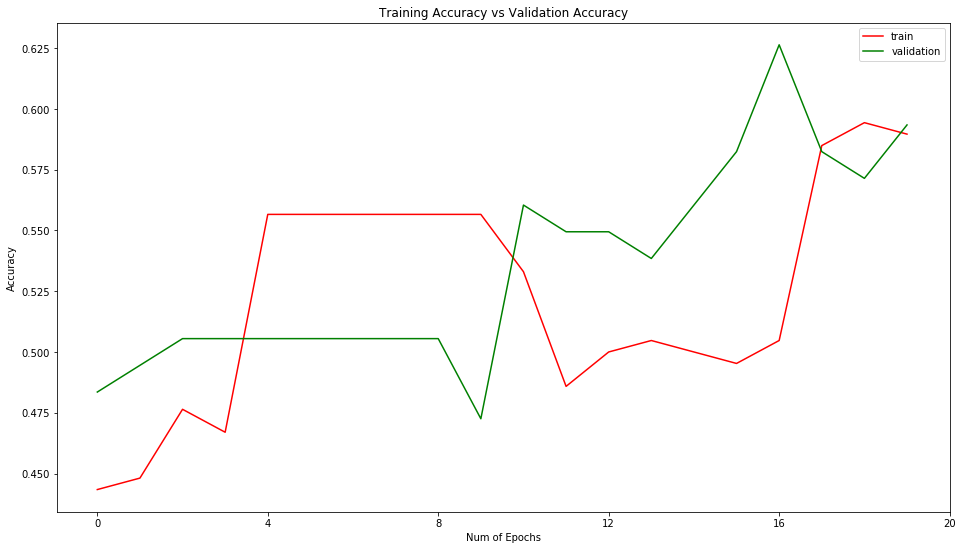

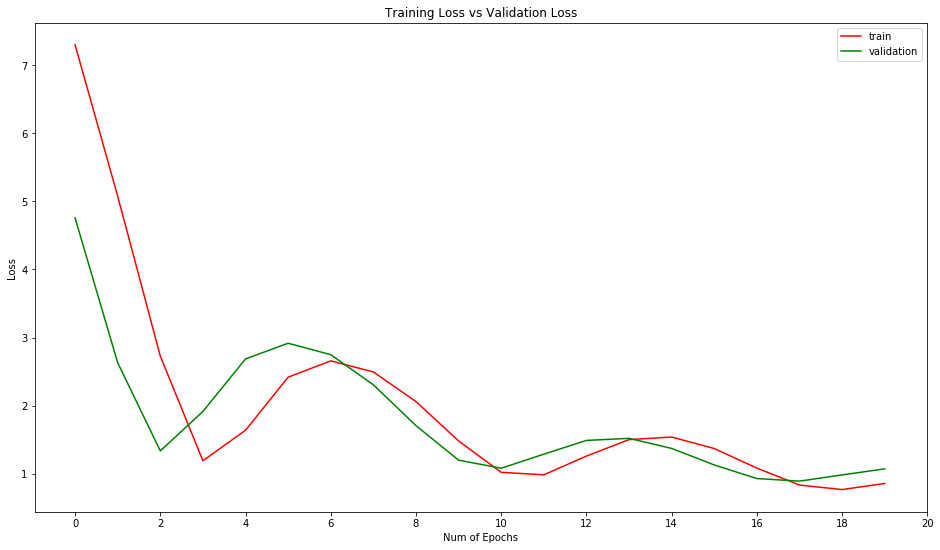

In [34]:
train_test_plot(history15,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Gradient estimation = "Adagrad"**

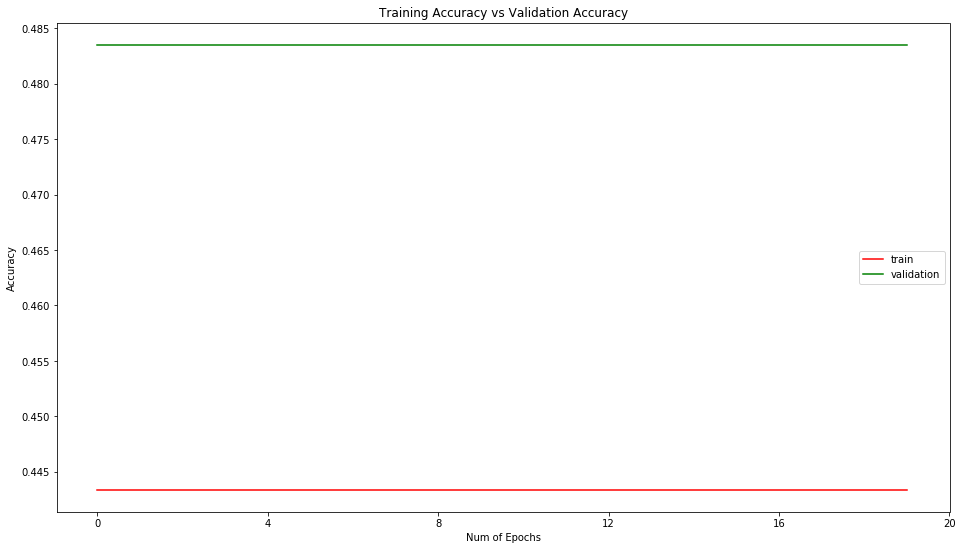

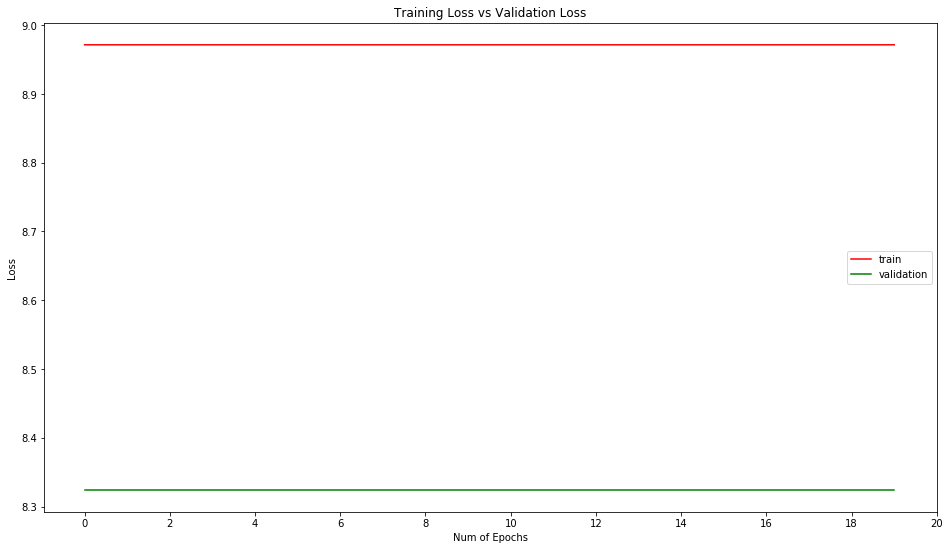

In [35]:
train_test_plot(history16,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Gradient estimation = "RMSProp"**

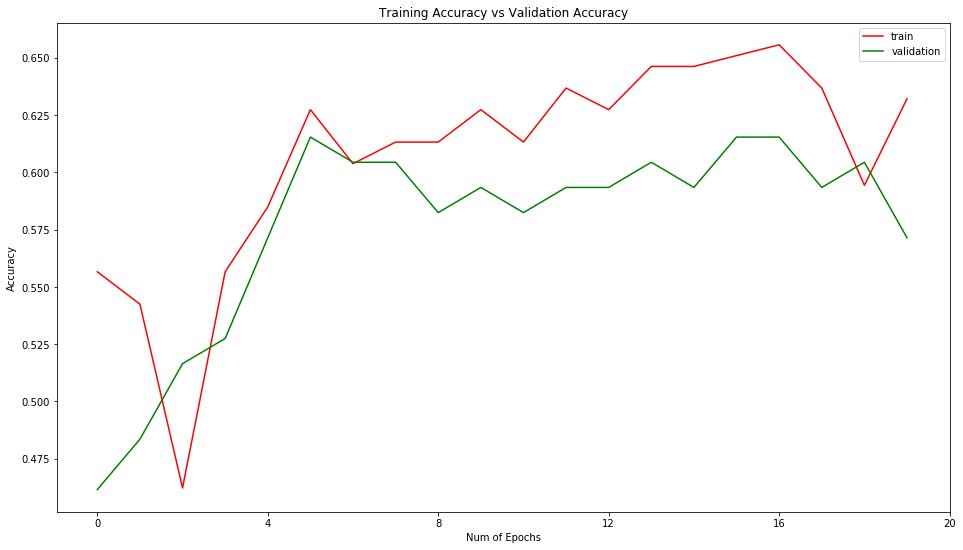

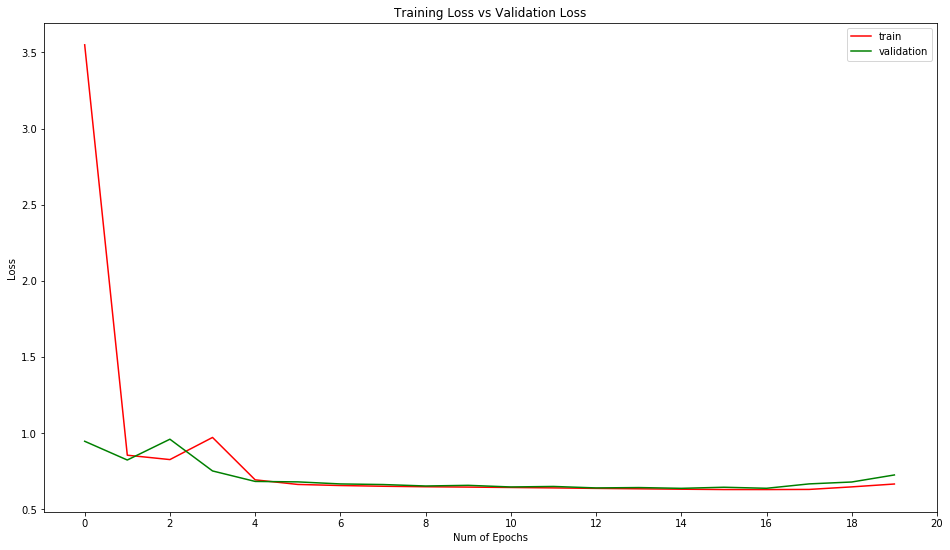

In [36]:
train_test_plot(history17,20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Gradient estimation = "Adadelta"**

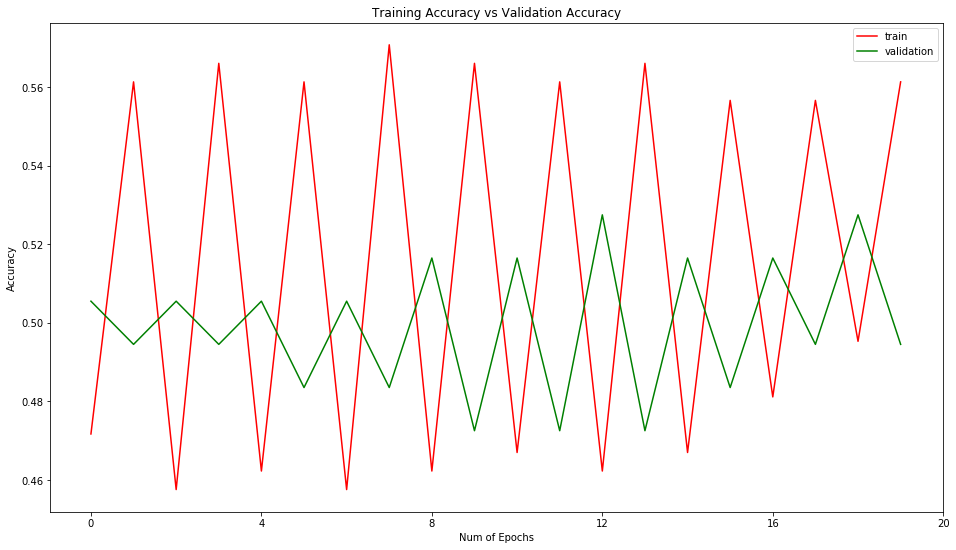

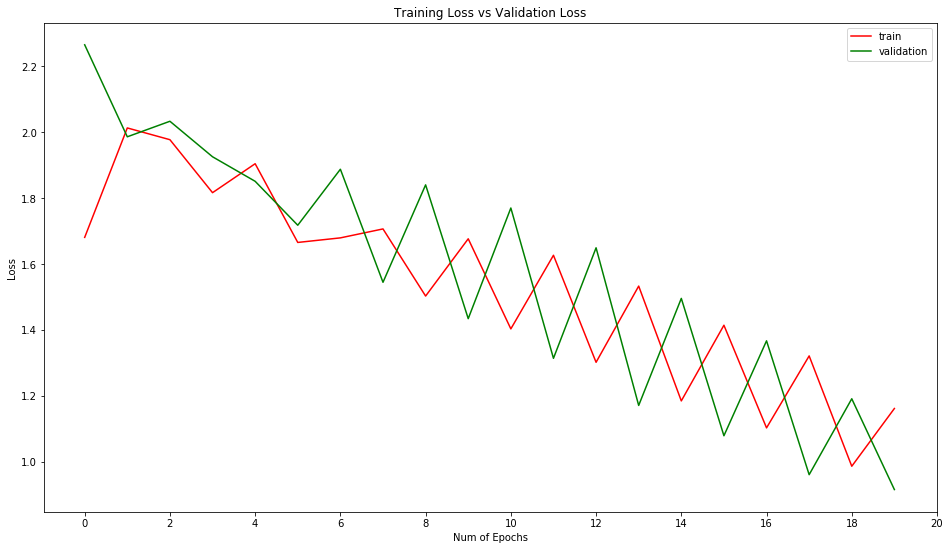

In [37]:
train_test_plot(history18,20)

# Part F - Network Architecture

In [38]:
def Trained_model_New(activation='relu',loss='binary_crossentropy', optimizer='adam', epochs = 20,kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'):
    model=Sequential()
    
    #Layer 1
    model.add(tf.keras.layers.Dense(10, Activation(activation), input_shape=(X_train.shape[1],),kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'))
    
    #Layer 2
    model.add(tf.keras.layers.Dense(64, Activation(activation),kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'))
    
    #Layer 3
    model.add(tf.keras.layers.Dense(32, Activation(activation),kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'))
    
    #Layer 4
    model.add(tf.keras.layers.Dense(64, Activation(activation),kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'))
    
    #Layer 5
    model.add(tf.keras.layers.Dense(32, Activation(activation),kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'))
    
    #Layer 6
    model.add(tf.keras.layers.Dense(16, Activation(activation),kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'))

    
    # last layer has only two possible outcomes
    # either 0 or 1 indicating not diagnosed and diagnosed respectively
    model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))
    
    # get summary of the model
    model.summary()
    
    model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
    
    # model fitting, we train and test the data
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=256,validation_data=(X_test, y_test),verbose=1)
    cvscores = []
    scores = model.evaluate(X_test, y_test, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
    return model, history

In [39]:
model20,history20 = Trained_model_New()
model21,history21 = Trained_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_97 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_98 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_99 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_101 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 17        
Total para

Epoch 10/20
212/212 [==============================] - 0s 62us/step - loss: 0.6890 - acc: 0.5519 - val_loss: 0.8137 - val_acc: 0.4945
Epoch 11/20
212/212 [==============================] - 0s 54us/step - loss: 0.8466 - acc: 0.4434 - val_loss: 0.8948 - val_acc: 0.4945
Epoch 12/20
212/212 [==============================] - 0s 57us/step - loss: 0.9444 - acc: 0.4434 - val_loss: 0.9241 - val_acc: 0.4945
Epoch 13/20
212/212 [==============================] - 0s 60us/step - loss: 0.9813 - acc: 0.4434 - val_loss: 0.9060 - val_acc: 0.4945
Epoch 14/20
212/212 [==============================] - 0s 52us/step - loss: 0.9614 - acc: 0.4434 - val_loss: 0.8555 - val_acc: 0.4945
Epoch 15/20
212/212 [==============================] - 0s 59us/step - loss: 0.9019 - acc: 0.4434 - val_loss: 0.7917 - val_acc: 0.4945
Epoch 16/20
212/212 [==============================] - 0s 67us/step - loss: 0.8271 - acc: 0.4387 - val_loss: 0.7368 - val_acc: 0.4945
Epoch 17/20
212/212 [==============================] - 0s 51us

| Activation | Loss | Optimizer | epochs |kernel_initializer | bias_initializer | Layers | Accuracy |
| --- | --- | --- | --- | --- | --- | ---| --- |
| relu | binary_crossentropy | adam | 20 | glorot_uniform | glorot_uniform | 6 | 59.34% |
| relu | binary_crossentropy | adam | 20 | glorot_uniform | glorot_uniform | 4 |51.65% |

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss when there were 6 layers**

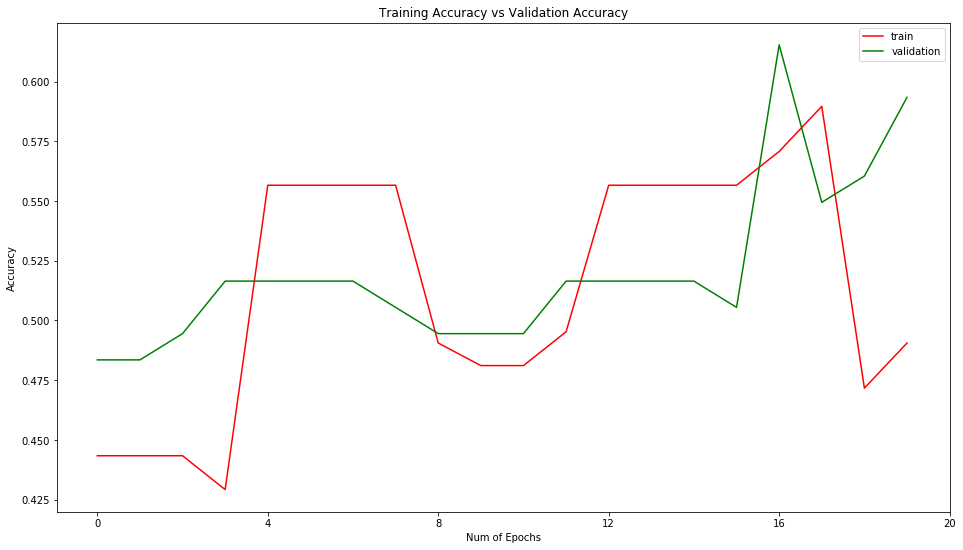

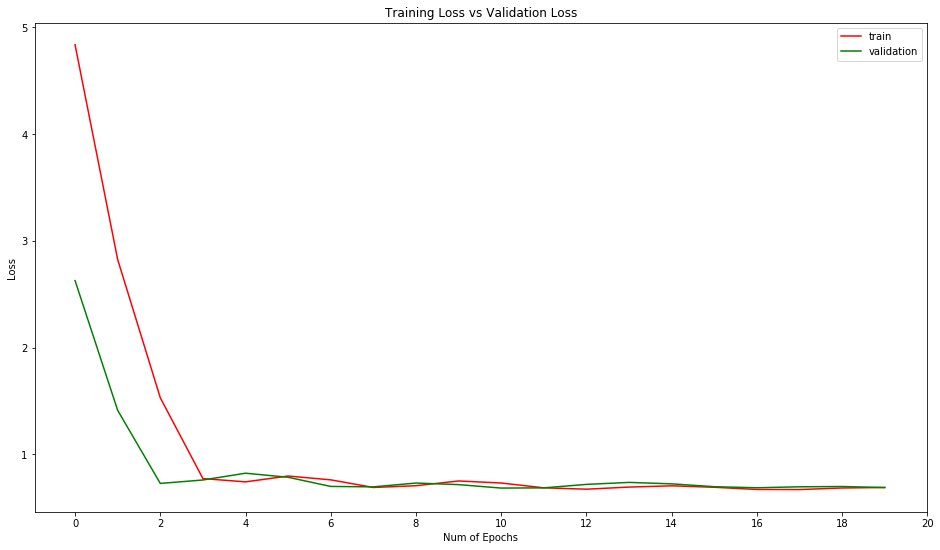

In [40]:
train_test_plot(history20, 20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss when there are 4 layers**

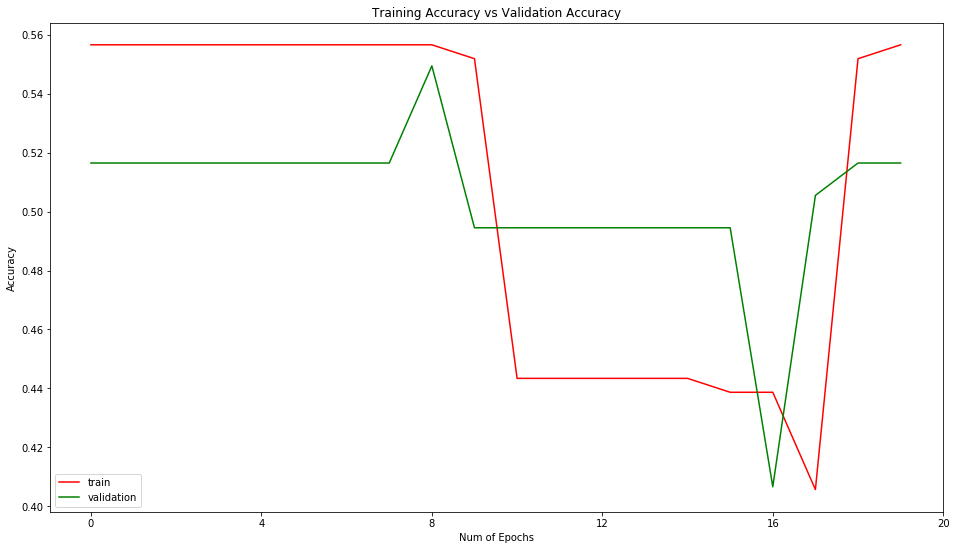

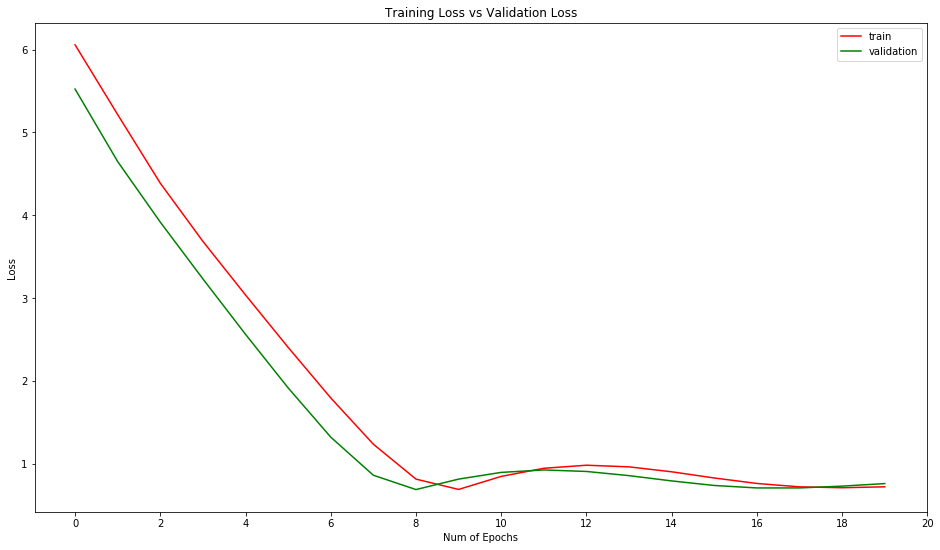

In [41]:
train_test_plot(history21, 20)

# Part G - Network initialization

**To see how the Initilizing the network affects the accuracy of the model we will pass our model with 5 different initilizer. Viz,** 

**--> Zeros**

**--> RandomUniform**

**--> glorut_normal**

In [42]:
model21, history21 = Trained_model_New(kernel_initializer='Zeros',bias_initializer='zeros')
model22, history22 = Trained_model_New(kernel_initializer='RandomUniform',bias_initializer='RandomUniform')
model22, history23 = Trained_model_New(kernel_initializer='glorot_normal',bias_initializer='glorot_normal')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_109 (Dense)            (None, 64)                704       
_________________________________________________________________
dense_110 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_111 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_112 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_113 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 17        
Total para

Epoch 4/20
212/212 [==============================] - 0s 87us/step - loss: 0.6725 - acc: 0.6462 - val_loss: 0.8299 - val_acc: 0.5165
Epoch 5/20
212/212 [==============================] - 0s 83us/step - loss: 0.7824 - acc: 0.5660 - val_loss: 0.8820 - val_acc: 0.5055
Epoch 6/20
212/212 [==============================] - 0s 71us/step - loss: 0.8637 - acc: 0.5566 - val_loss: 0.8563 - val_acc: 0.5165
Epoch 7/20
212/212 [==============================] - 0s 79us/step - loss: 0.8524 - acc: 0.5566 - val_loss: 0.7766 - val_acc: 0.5275
Epoch 8/20
212/212 [==============================] - 0s 76us/step - loss: 0.7747 - acc: 0.5566 - val_loss: 0.6736 - val_acc: 0.5604
Epoch 9/20
212/212 [==============================] - 0s 75us/step - loss: 0.6722 - acc: 0.5849 - val_loss: 0.6185 - val_acc: 0.6484
Epoch 10/20
212/212 [==============================] - 0s 78us/step - loss: 0.6266 - acc: 0.6651 - val_loss: 0.6380 - val_acc: 0.6374
Epoch 11/20
212/212 [==============================] - 0s 79us/step 

| Activation | Loss | Optimizer | epochs |kernel_initializer | bias_initializer |  Accuracy |
| --- | --- | --- | --- | --- | --- | ---|
| relu | binary_crossentropy | adam | 20 | Zeros | Zeros | 67.03% |
| relu | binary_crossentropy | adam | 20 | RandomUniform | RandomUniform |51.65% |
| relu | binary_crossentropy | adam | 20 | glorot_normal | glorot_normal |51.65% |

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Initilizer Funtion "Zeros"**

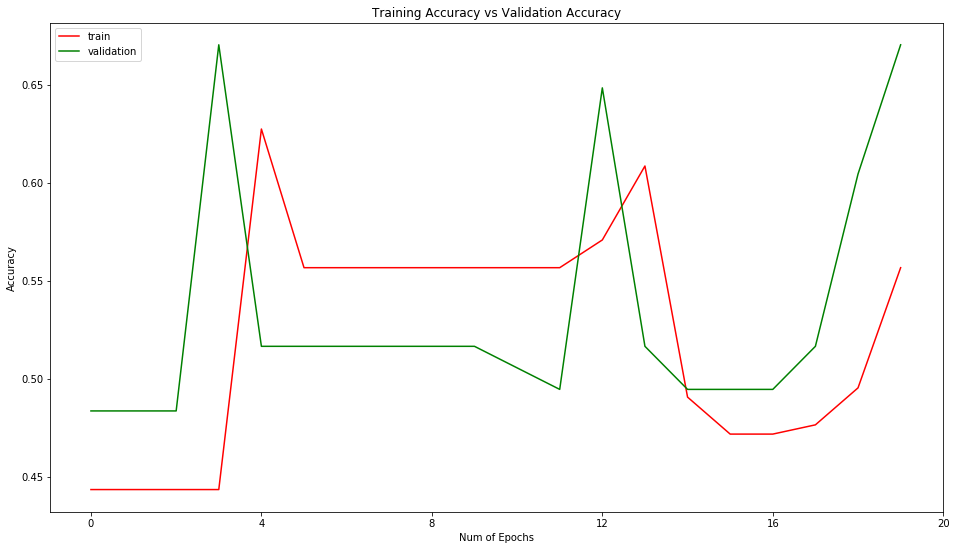

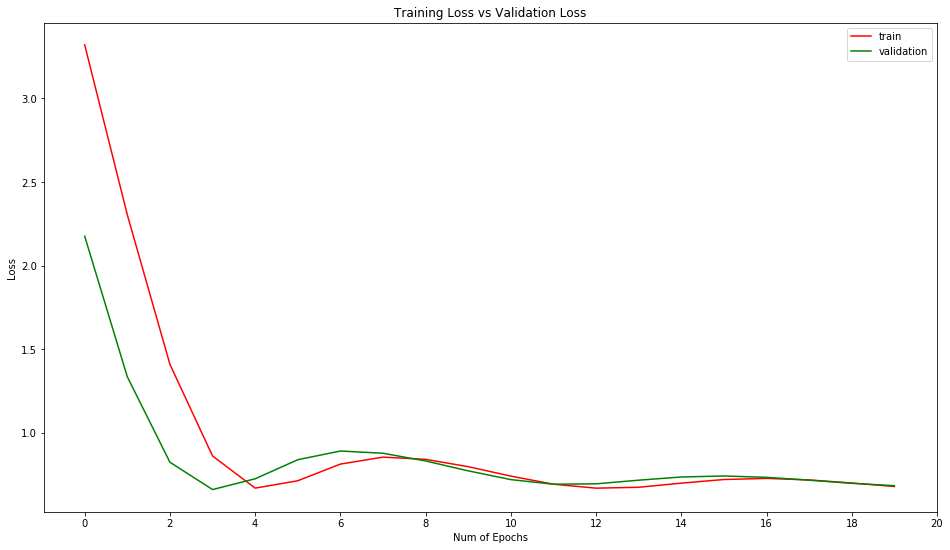

In [43]:
train_test_plot(history21, 20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Initilizer Funtion "RandomUniform"**

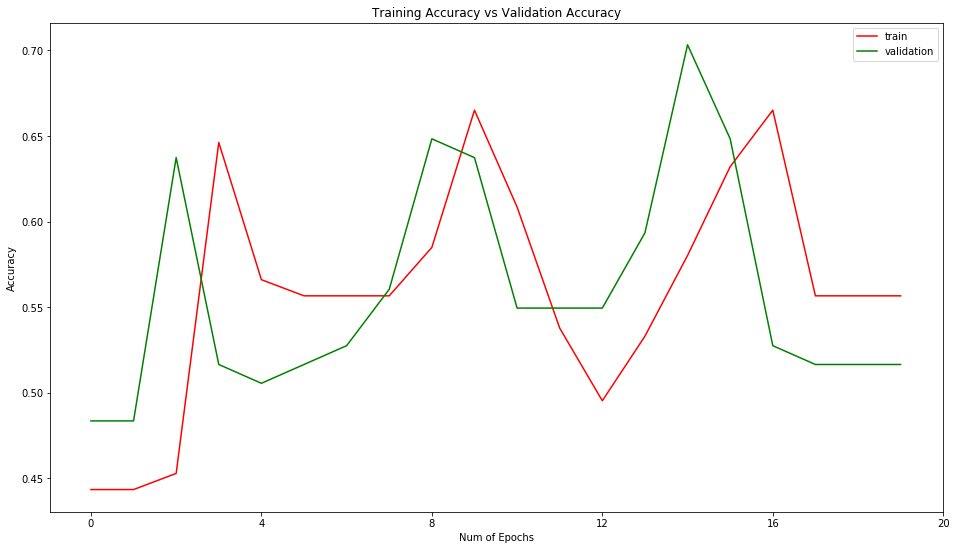

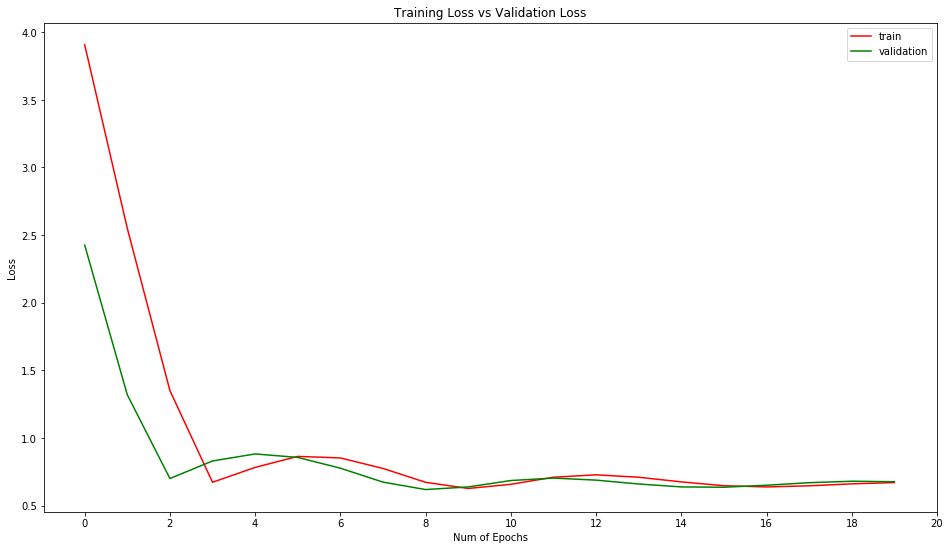

In [44]:
train_test_plot(history22, 20)

** Plot of Training Accuracy vs Validation Accuracy and Training Loss vs Validating Loss of the Initilizer Funtion "glorot_normal"**

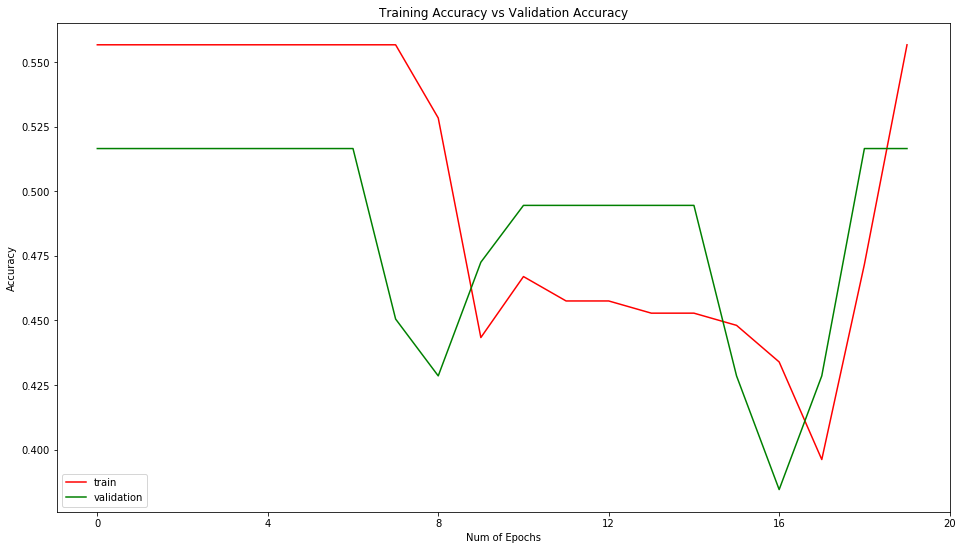

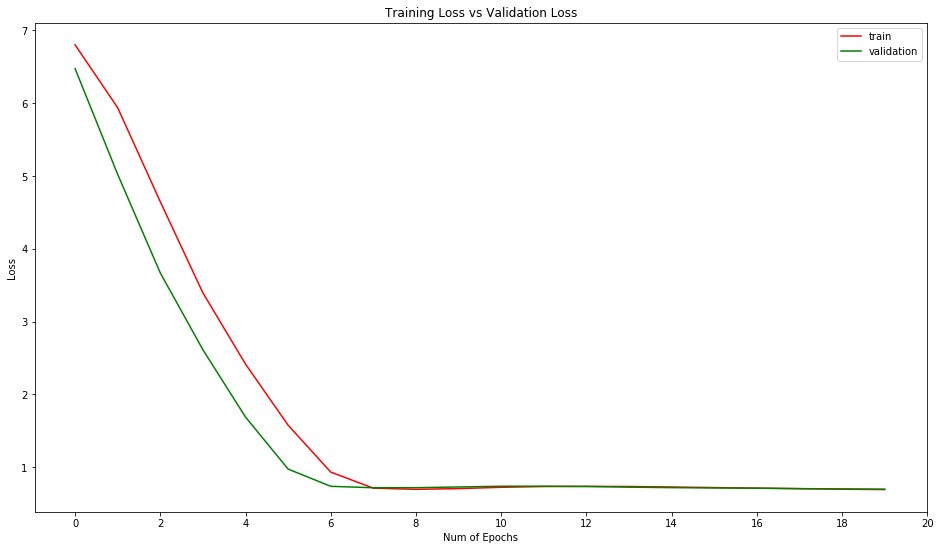

In [45]:
train_test_plot(history23, 20)